# Sklearn

## sklearn.metrics

документация: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [1]:
from sklearn import cross_validation, datasets, linear_model, metrics 
from matplotlib.colors import ListedColormap

/home/konagmo/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Генерация датасетов

In [43]:
clf_data, clf_target = datasets.make_classification(n_features = 2, n_informative = 2, n_classes = 2, 
                                                    n_redundant = 0, n_clusters_per_class = 1, 
                                                    random_state = 7)

In [44]:
reg_data, reg_target = datasets.make_regression(n_features = 2, n_informative = 1, n_targets = 1, 
                                                noise = 5., random_state = 7)

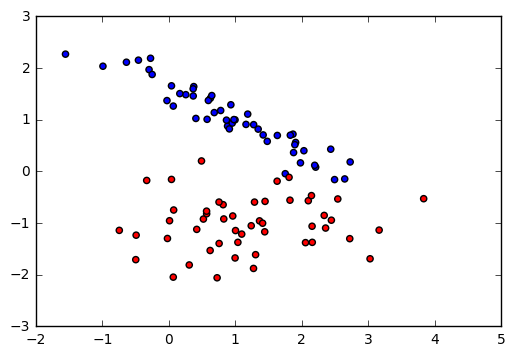

In [45]:
colors = ListedColormap(['red', 'blue'])
pylab.scatter(map(lambda x: x[0], clf_data), map(lambda x: x[1], clf_data), c = clf_target, cmap = colors)

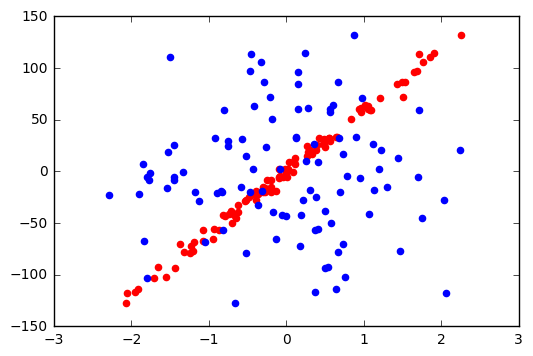

In [46]:
pylab.scatter(map(lambda x:x[1], reg_data), reg_target, color = 'r')
pylab.scatter(map(lambda x:x[0], reg_data), reg_target, color = 'b')

In [47]:
clf_train_data, clf_test_data, clf_train_labels, clf_test_labels = cross_validation.train_test_split(clf_data, clf_target,
                                                                                     test_size = 0.3, random_state = 1)

In [48]:
reg_train_data, reg_test_data, reg_train_labels, reg_test_labels = cross_validation.train_test_split(reg_data, reg_target,
                                                                                     test_size = 0.3, random_state = 1)

### Метрики качества в задачах классификации

#### Обучение модели классификации

In [49]:
classifier = linear_model.SGDClassifier(loss = 'log', random_state = 1)

In [50]:
classifier.fit(clf_train_data, clf_train_labels)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=1, shuffle=True, verbose=0,
       warm_start=False)

In [51]:
predictions = classifier.predict(clf_test_data)

In [52]:
probability_predictions = classifier.predict_proba(clf_test_data)

In [53]:
print clf_test_labels

[1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0]


In [54]:
print predictions

[1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0]


In [55]:
print probability_predictions

[[  0.00000000e+00   1.00000000e+00]
 [  9.95554904e-01   4.44509628e-03]
 [  1.00000000e+00   4.17153536e-26]
 [  0.00000000e+00   1.00000000e+00]
 [  1.00000000e+00   2.45692476e-49]
 [  0.00000000e+00   1.00000000e+00]
 [  0.00000000e+00   1.00000000e+00]
 [  9.99999901e-01   9.92417257e-08]
 [  0.00000000e+00   1.00000000e+00]
 [  1.00000000e+00   2.92963762e-44]
 [  9.99999994e-01   5.56733964e-09]
 [  1.00000000e+00   2.83193817e-10]
 [  0.00000000e+00   1.00000000e+00]
 [  0.00000000e+00   1.00000000e+00]
 [  1.00000000e+00   1.33422211e-35]
 [  1.00000000e+00   7.16484564e-45]
 [  0.00000000e+00   1.00000000e+00]
 [  1.00000000e+00   1.18444277e-25]
 [  1.00000000e+00   9.71334090e-27]
 [  0.00000000e+00   1.00000000e+00]
 [  1.00000000e+00   4.27559507e-30]
 [  1.00000000e+00   2.61265801e-20]
 [  1.00000000e+00   3.30318132e-44]
 [  1.00000000e+00   7.13122246e-60]
 [  1.00000000e+00   2.57224107e-23]
 [  1.00000000e+00   1.35226091e-24]
 [  0.00000000e+00   1.00000000e+00]
 

#### accuracy

In [56]:
sum([1. if pair[0] == pair[1] else 0. for pair in zip(clf_test_labels, predictions)])/len(clf_test_labels)

1.0

In [57]:
metrics.accuracy_score(clf_test_labels, predictions)

1.0

#### confusion matrix

In [58]:
matrix = metrics.confusion_matrix(clf_test_labels, predictions)
print matrix

[[18  0]
 [ 0 12]]


In [19]:
sum([1 if pair[0] == pair[1] else 0 for pair in zip(clf_test_labels, predictions)])

30

In [20]:
matrix.diagonal().sum()

30

#### precision 

In [21]:
metrics.precision_score(clf_test_labels, predictions, pos_label = 0)

1.0

In [22]:
metrics.precision_score(clf_test_labels, predictions)

1.0

#### recall

In [23]:
metrics.recall_score(clf_test_labels, predictions, pos_label = 0)

1.0

In [24]:
metrics.recall_score(clf_test_labels, predictions)

1.0

#### f1

In [25]:
metrics.f1_score(clf_test_labels, predictions, pos_label = 0)

1.0

In [26]:
metrics.f1_score(clf_test_labels, predictions)

1.0

#### classification report

In [27]:
print metrics.classification_report(clf_test_labels, predictions)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        18
          1       1.00      1.00      1.00        12

avg / total       1.00      1.00      1.00        30



#### ROC curve

In [28]:
fpr, tpr, _ = metrics.roc_curve(clf_test_labels, probability_predictions[:,1])

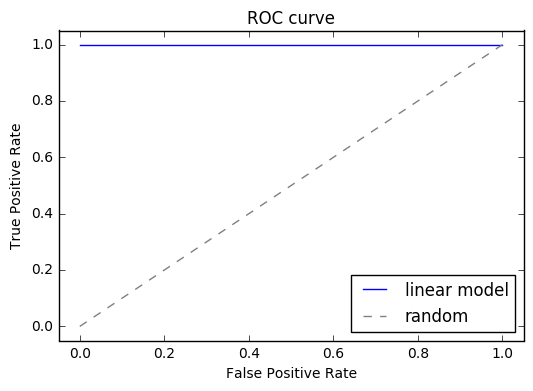

In [29]:
pylab.plot(fpr, tpr, label = 'linear model')
pylab.plot([0, 1], [0, 1], '--', color = 'grey', label = 'random')
pylab.xlim([-0.05, 1.05])
pylab.ylim([-0.05, 1.05])
pylab.xlabel('False Positive Rate')
pylab.ylabel('True Positive Rate')
pylab.title('ROC curve')
pylab.legend(loc = "lower right")

#### ROC AUC

In [30]:
metrics.roc_auc_score(clf_test_labels, predictions)

1.0

In [31]:
metrics.roc_auc_score(clf_test_labels, probability_predictions[:,1])

1.0

#### PR AUC

In [32]:
metrics.average_precision_score(clf_test_labels, predictions)

1.0

#### log_loss

In [33]:
metrics.log_loss(clf_test_labels, probability_predictions[:,1])

0.00014850367284570794

### Метрики качества в задачах регрессии

#### Обучение регрессионной модели 

In [34]:
regressor = linear_model.SGDRegressor(random_state = 1, n_iter = 20)

In [35]:
regressor.fit(reg_train_data, reg_train_labels)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=20, penalty='l2', power_t=0.25,
       random_state=1, shuffle=True, verbose=0, warm_start=False)

In [36]:
reg_predictions = regressor.predict(reg_test_data)

In [37]:
print reg_test_labels

[   2.67799047    7.06525927  -56.43389936   10.08001896  -22.46817716
  -19.27471232   59.44372825  -21.60494574   32.54682713  -41.89798772
  -18.16390935   32.75688783   31.04095773    2.39589626   -5.04783924
  -70.20925097   86.69034305   18.50402992   32.31573461 -101.81138022
   15.14628858   29.49813932   97.282674     25.88034991  -41.63332253
  -92.11198201   86.7177122     2.13250832  -20.24967575  -27.32511755]


In [38]:
print reg_predictions

[ -1.46503565   5.75776789 -50.13234306   5.05646094 -24.09370893
  -8.34831546  61.77254998 -21.98350565  30.65112022 -39.25972497
 -17.19337022  30.94178225  26.98820076  -6.08321732  -3.46551    -78.9843398
  84.80190097  14.80638314  22.91302375 -89.63572717  14.5954632
  31.64431951  95.81031534  21.5037679  -43.1101736  -95.06972123
  86.70086546   0.47837761 -16.44594704 -22.72581879]


#### mean absolute error

In [39]:
metrics.mean_absolute_error(reg_test_labels, reg_predictions)

3.748761311885298

#### mean squared error

In [40]:
metrics.mean_squared_error(reg_test_labels, reg_predictions)

24.114925597460914

#### root mean squared error

In [41]:
sqrt(metrics.mean_squared_error(reg_test_labels, reg_predictions))

4.9106950218335603

#### r2 score

In [42]:
metrics.r2_score(reg_test_labels, reg_predictions)

0.98931761505469495